# DSCI 503 - Project 04
### Bernard Mwamburi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Part 1: Loading the Dataset; Preliminary Analysis
We will load the forest cover dataset into a Pandas Dataframe and explore the structure of the dataset

In [2]:
fc = pd.read_csv('forest_cover.txt', sep='\t')
fc.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


Determine the size of the dataset. It contains 15120 entries and 13 columns.

In [3]:
fc.shape

(15120, 13)

Inspect the distribution of cover types in the dataset

In [4]:
fc.loc[:, 'Cover_Type'].value_counts().sort_index()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

Create a list of seven colors to be used in the plots we will create.

In [5]:
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

## Part 2: Distribution of Cover Type by Wilderness Area
We will start by determining the distribution of the wilderness area within our dataset.

In [6]:
fc.loc[:, 'Wilderness_Area'].value_counts().sort_index()

Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: Wilderness_Area, dtype: int64

Create a Dataframe to determine how many regions of each cover typr are in each of the four wilderness areas.

In [7]:
ct_by_wa = pd.crosstab(fc.loc[:, 'Cover_Type'], fc.loc[:, 'Wilderness_Area'])
ct_by_wa

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


Visually represent the information in the Dataframe created above in the form of a stacked bar chart.

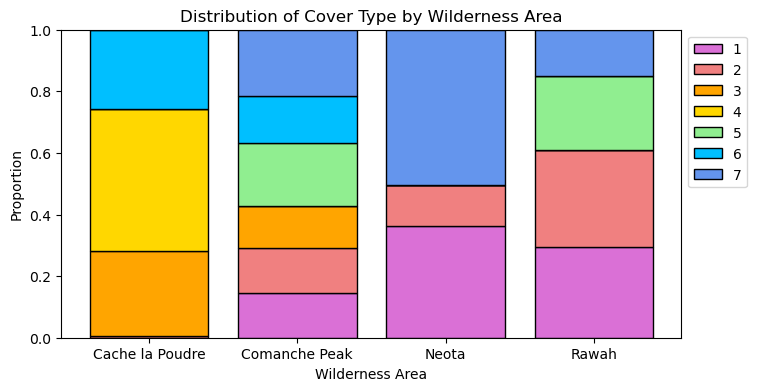

In [8]:
ct_by_wa_props = ct_by_wa / np.sum(ct_by_wa)
bb = np.cumsum(ct_by_wa_props) - ct_by_wa_props
plt.figure(figsize=[8, 4])
for i, row in enumerate(ct_by_wa_props.iterrows()):
    label, counts = row
    plt.bar(ct_by_wa_props.columns, counts, label=str(label), color=palette[i], edgecolor='k', bottom=bb.iloc[i])
    
plt.xlabel('Wilderness Area')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Wilderness Area')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

## Part 3: Distribution of Cover Type by Soil Type
We will start by creating a Dataframe to determine the number of regions of each cover type there are for each of the 40 soil types.

In [9]:
ct_by_st = pd.crosstab(fc.loc[:, 'Cover_Type'], fc.loc[:, 'Soil_Type'])
ct_by_st

Soil_Type,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,...,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,...,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,...,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,...,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,...,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,...,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,...,27,70,67,4,98,8,34,641,575,407


Visually represnt the information above in the form of a stacked bar chart.

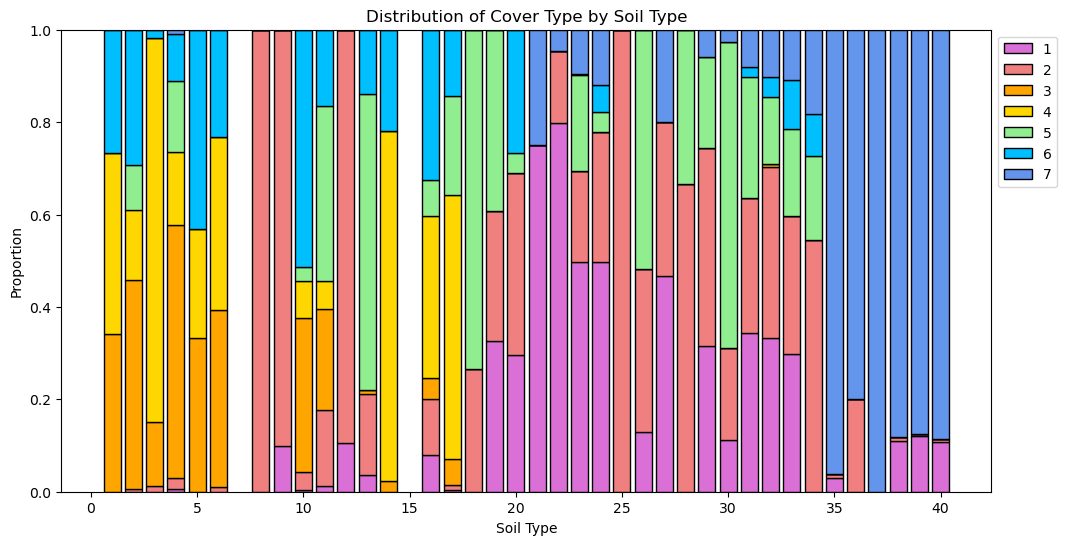

In [10]:
ct_by_st_props = ct_by_st / np.sum(ct_by_st)
bb = np.cumsum(ct_by_st_props) - ct_by_st_props
plt.figure(figsize=[12, 6])
for i, row in enumerate(ct_by_st_props.iterrows()):
    label, counts = row
    plt.bar(ct_by_st_props.columns, counts, label=str(label), color=palette[i], edgecolor='k', bottom=bb.iloc[i])
    
plt.xlabel('Soil Type')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Soil Type')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

## Part 4: Distribution of Elevation by Cover Type
We will start by calculating the average elevation for eah of the seven cover types.

In [11]:
ct_by_elev = fc.loc[:, ['Elevation', 'Cover_Type']].groupby('Cover_Type').mean()
ct_by_elev

,Elevation
Cover_Type,
1,3128.025926
2,2922.540278
3,2398.423148
4,2223.420370
5,2786.801389
6,2423.276852
7,3362.769907


Create histograms to visually explore the distribution of elevations for each of the seven cover types.

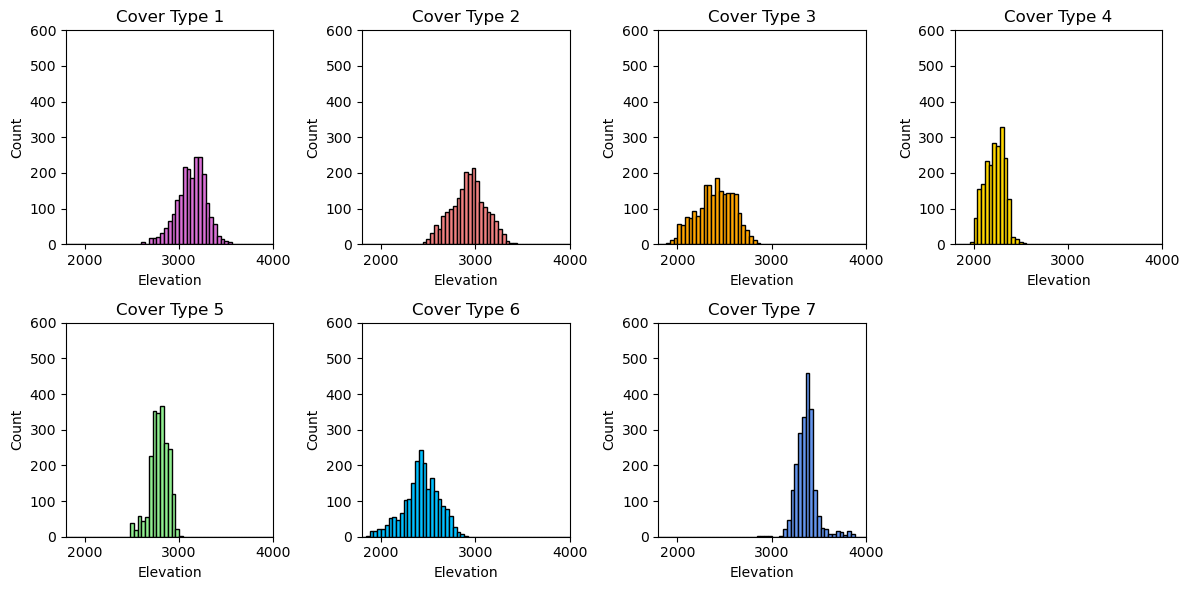

In [12]:
plt.figure(figsize=[12, 6])
for i in range(1, 8):
    boolean_mask = fc.loc[:, 'Cover_Type'] == i
    plt.subplot(2, 4, i)
    plt.hist(fc[boolean_mask]['Elevation'], bins=np.arange(1800, 4050, 40), color=palette[i - 1], edgecolor='k')
    plt.title(f'Cover Type {i}')
    plt.xlim(1800, 4000)
    plt.ylim(0, 600)
    plt.xlabel('Elevation')
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()

## Part 5: Creating Training, Validation, and Test Sets
We will start by separating the categorical features, the numerical features, and the labels.

In [13]:
X_num = fc.drop(columns=['Wilderness_Area', 'Soil_Type', 'Cover_Type'], inplace=False).values
X_cat = fc.loc[:, ['Wilderness_Area', 'Soil_Type']].values
y = fc.loc[:, 'Cover_Type'].values

print(f'''
Numerical Feature Array Shape:   {X_num.shape}
Categorical Feature Array Shape: {X_cat.shape}
Label Array Shape:               {y.shape}
''')


Numerical Feature Array Shape:   (15120, 10)
Categorical Feature Array Shape: (15120, 2)
Label Array Shape:               (15120,)



Encode the categorical variables using one-hot encoding.

In [14]:
encode = OneHotEncoder(sparse_output=False)
encode.fit(X_cat)
X_enc = encode.transform(X_cat)

print(f'Encoded Feature Array Shape: {X_enc.shape}')

Encoded Feature Array Shape: (15120, 42)


Combine the numerical features with the encoded features.

In [15]:
X = np.hstack((X_num, X_enc))

print(f'Feature Array Shape: {X.shape}')

Feature Array Shape: (15120, 52)


Split the data into training, validation, and test sets, using a 70/15/15 split.

In [16]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.30, stratify=y, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size=0.50, stratify=y_hold, random_state=1)

print(f'''
Training Features Shape:   {X_train.shape}
Validation Features Shape: {X_valid.shape}
Test Features Shape:       {X_test.shape}
''')


Training Features Shape:   (10584, 52)
Validation Features Shape: (2268, 52)
Test Features Shape:       (2268, 52)



## Part 6: Logistic Regression Model
We will create and evaluate a logistic regression model.

In [17]:
lr_mod = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial', penalty=None)
lr_mod.fit(X_train, y_train)
print(f'''
Training Accuracy:   {np.round(lr_mod.score(X_train, y_train), 4)}
Validation Accuracy: {np.round(lr_mod.score(X_valid, y_valid), 4)}
''')


Training Accuracy:   0.6056
Validation Accuracy: 0.6107



C:\Users\MRT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Part 7: Decision Tree Models
We will create and evaluate several decision tree models.

In [18]:
dt_train_acc = []
dt_valid_acc = []
depth_range = range(2, 31)

for depth in depth_range:
    np.random.seed(1)
    temp_tree = DecisionTreeClassifier(max_depth=depth)
    temp_tree.fit(X_train, y_train)
    dt_train_acc.append(temp_tree.score(X_train, y_train))
    dt_valid_acc.append(temp_tree.score(X_valid, y_valid))
    
dt_idx = np.argmax(dt_valid_acc)
dt_opt_depth = list(depth_range)[dt_idx]

print(f'''
Optimal value for max_depth:           {dt_opt_depth}
Training Accuracy for Optimal Model:   {np.round(dt_train_acc[dt_idx], 4)}
Validation Accuracy for Optimal Model: {np.round(dt_valid_acc[dt_idx], 4)}
''')


Optimal value for max_depth:           18
Training Accuracy for Optimal Model:   0.9804
Validation Accuracy for Optimal Model: 0.772



Plot the training and validation curves as a function of max_depth.

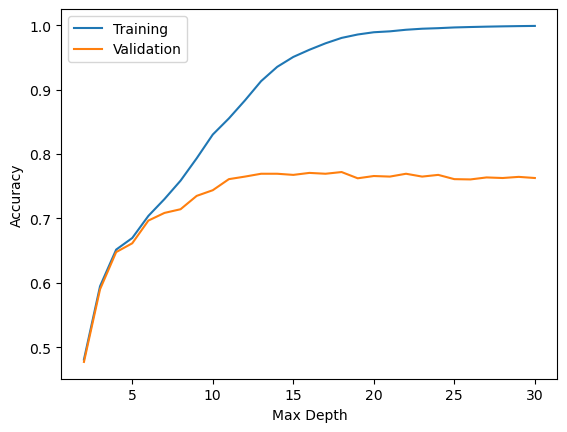

In [19]:
plt.plot(list(depth_range), dt_train_acc, label='Training')
plt.plot(list(depth_range), dt_valid_acc, label='Validation')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()

## Part 8: Random Forest Models
We will create and evaluate several random forest models.

In [20]:
rf_train_acc = []
rf_valid_acc = []

for depth in depth_range:
    np.random.seed(1)
    temp_forest = RandomForestClassifier(max_depth=depth, n_estimators=100)
    temp_forest.fit(X_train, y_train)
    rf_train_acc.append(temp_forest.score(X_train, y_train))
    rf_valid_acc.append(temp_forest.score(X_valid, y_valid))
    
rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = list(depth_range)[rf_idx]

print(f'''
Optimal value for max_depth:           {rf_opt_depth}
Training Accuracy for Optimal Model:   {np.round(rf_train_acc[rf_idx], 4)}
Validation Accuracy for Optimal Model: {np.round(rf_valid_acc[rf_idx], 4)}
''')


Optimal value for max_depth:           28
Training Accuracy for Optimal Model:   1.0
Validation Accuracy for Optimal Model: 0.8677



Plot the training and validation curves as a function of max_depth.

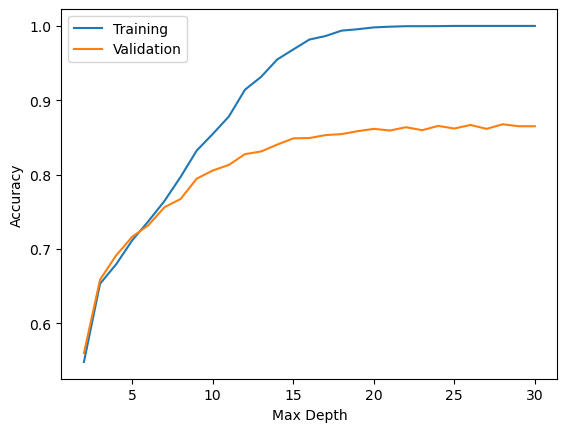

In [21]:
plt.plot(list(depth_range), rf_train_acc, label='Training')
plt.plot(list(depth_range), rf_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()

## Part 9: Create and Evaluate Final Model
We will use the Random Forest model as our final model with the max_depth parameter set to 28 and the n_estimators set to 100.
We will evaluate this model on the test set.

In [22]:
np.random.seed(1)
final_model = RandomForestClassifier(max_depth=28, n_estimators=100)
final_model.fit(X_train, y_train)

print(f'''
Training Accuracy for Final Model:   {np.round(final_model.score(X_train, y_train), 4)}
Validation Accuracy for Final Model: {np.round(final_model.score(X_valid, y_valid), 4)}
Testing Accuracy for Final Model:    {np.round(final_model.score(X_test, y_test), 4)}
''')


Training Accuracy for Final Model:   1.0
Validation Accuracy for Final Model: 0.8677
Testing Accuracy for Final Model:    0.8593



Display a confusion matrix detailing the model's performance on the test set.

In [23]:
test_pred = final_model.predict(X_test)
matrix = confusion_matrix(y_test, test_pred)
rf_matrix = pd.DataFrame(matrix, index=['1', '2', '3', '4', '5', '6', '7'], columns=['1', '2', '3', '4', '5', '6', '7'])
rf_matrix

,1,2,3,4,5,6,7
1,236,63,2,0,5,0,18
2,53,239,6,0,13,10,3
3,0,2,262,18,2,40,0
4,0,0,6,313,0,5,0
5,0,11,4,0,305,4,0
6,0,0,33,11,1,279,0
7,8,1,0,0,0,0,315


Generate a classification report to provide further insight into the model's performance on the test set.

In [24]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           1       0.79      0.73      0.76       324
           2       0.76      0.74      0.75       324
           3       0.84      0.81      0.82       324
           4       0.92      0.97      0.94       324
           5       0.94      0.94      0.94       324
           6       0.83      0.86      0.84       324
           7       0.94      0.97      0.95       324

    accuracy                           0.86      2268
   macro avg       0.86      0.86      0.86      2268
weighted avg       0.86      0.86      0.86      2268

